# CREDIT 데이터

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# 데이터 불러오기

credit = pd.read_csv('./Credit.csv')
credit

,Income,Limit,Rating,Cards,Age,Education,Own,Student,Married,Region,Balance
0,14.891,3606,283,2,34,11,No,No,Yes,South,333
1,106.025,6645,483,3,82,15,Yes,Yes,Yes,West,903
2,104.593,7075,514,4,71,11,No,No,No,West,580
3,148.924,9504,681,3,36,11,Yes,No,No,West,964
4,55.882,4897,357,2,68,16,No,No,Yes,South,331
...,...,...,...,...,...,...,...,...,...,...,...
395,12.096,4100,307,3,32,13,No,No,Yes,South,560
396,13.364,3838,296,5,65,17,No,No,No,East,480
397,57.872,4171,321,5,67,12,Yes,No,Yes,South,138
398,37.728,2525,192,1,44,13,No,No,Yes,South,0


## EDA

In [6]:
# 데이터 타입 확인
credit.dtypes

Income       float64
Limit          int64
Rating         int64
Cards          int64
Age            int64
Education      int64
Own           object
Student       object
Married       object
Region        object
Balance        int64
dtype: object

In [7]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Income     400 non-null    float64
 1   Limit      400 non-null    int64  
 2   Rating     400 non-null    int64  
 3   Cards      400 non-null    int64  
 4   Age        400 non-null    int64  
 5   Education  400 non-null    int64  
 6   Own        400 non-null    object 
 7   Student    400 non-null    object 
 8   Married    400 non-null    object 
 9   Region     400 non-null    object 
 10  Balance    400 non-null    int64  
dtypes: float64(1), int64(6), object(4)
memory usage: 34.5+ KB


In [8]:
# 데이터 통계 확인
credit.describe()

,Income,Limit,Rating,Cards,Age,Education,Balance
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,45.218885,4735.600000,354.940000,2.957500,55.667500,13.450000,520.015000
std,35.244273,2308.198848,154.724143,1.371275,17.249807,3.125207,459.758877
min,10.354000,855.000000,93.000000,1.000000,23.000000,5.000000,0.000000
25%,21.007250,3088.000000,247.250000,2.000000,41.750000,11.000000,68.750000
50%,33.115500,4622.500000,344.000000,3.000000,56.000000,14.000000,459.500000
75%,57.470750,5872.750000,437.250000,4.000000,70.000000,16.000000,863.000000
max,186.634000,13913.000000,982.000000,9.000000,98.000000,20.000000,1999.000000


mean / median(50%) : income, limit 차이가 많이 난다.

대부분 변수의 표준편차가 크다

min-max : 데이터 범주가 넓은 편임

<AxesSubplot:>

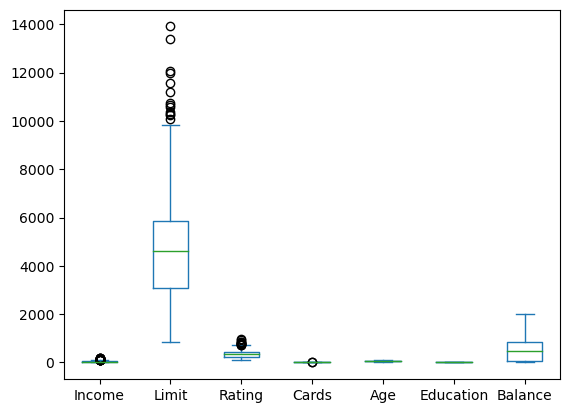

In [9]:
credit.plot(kind = 'box')

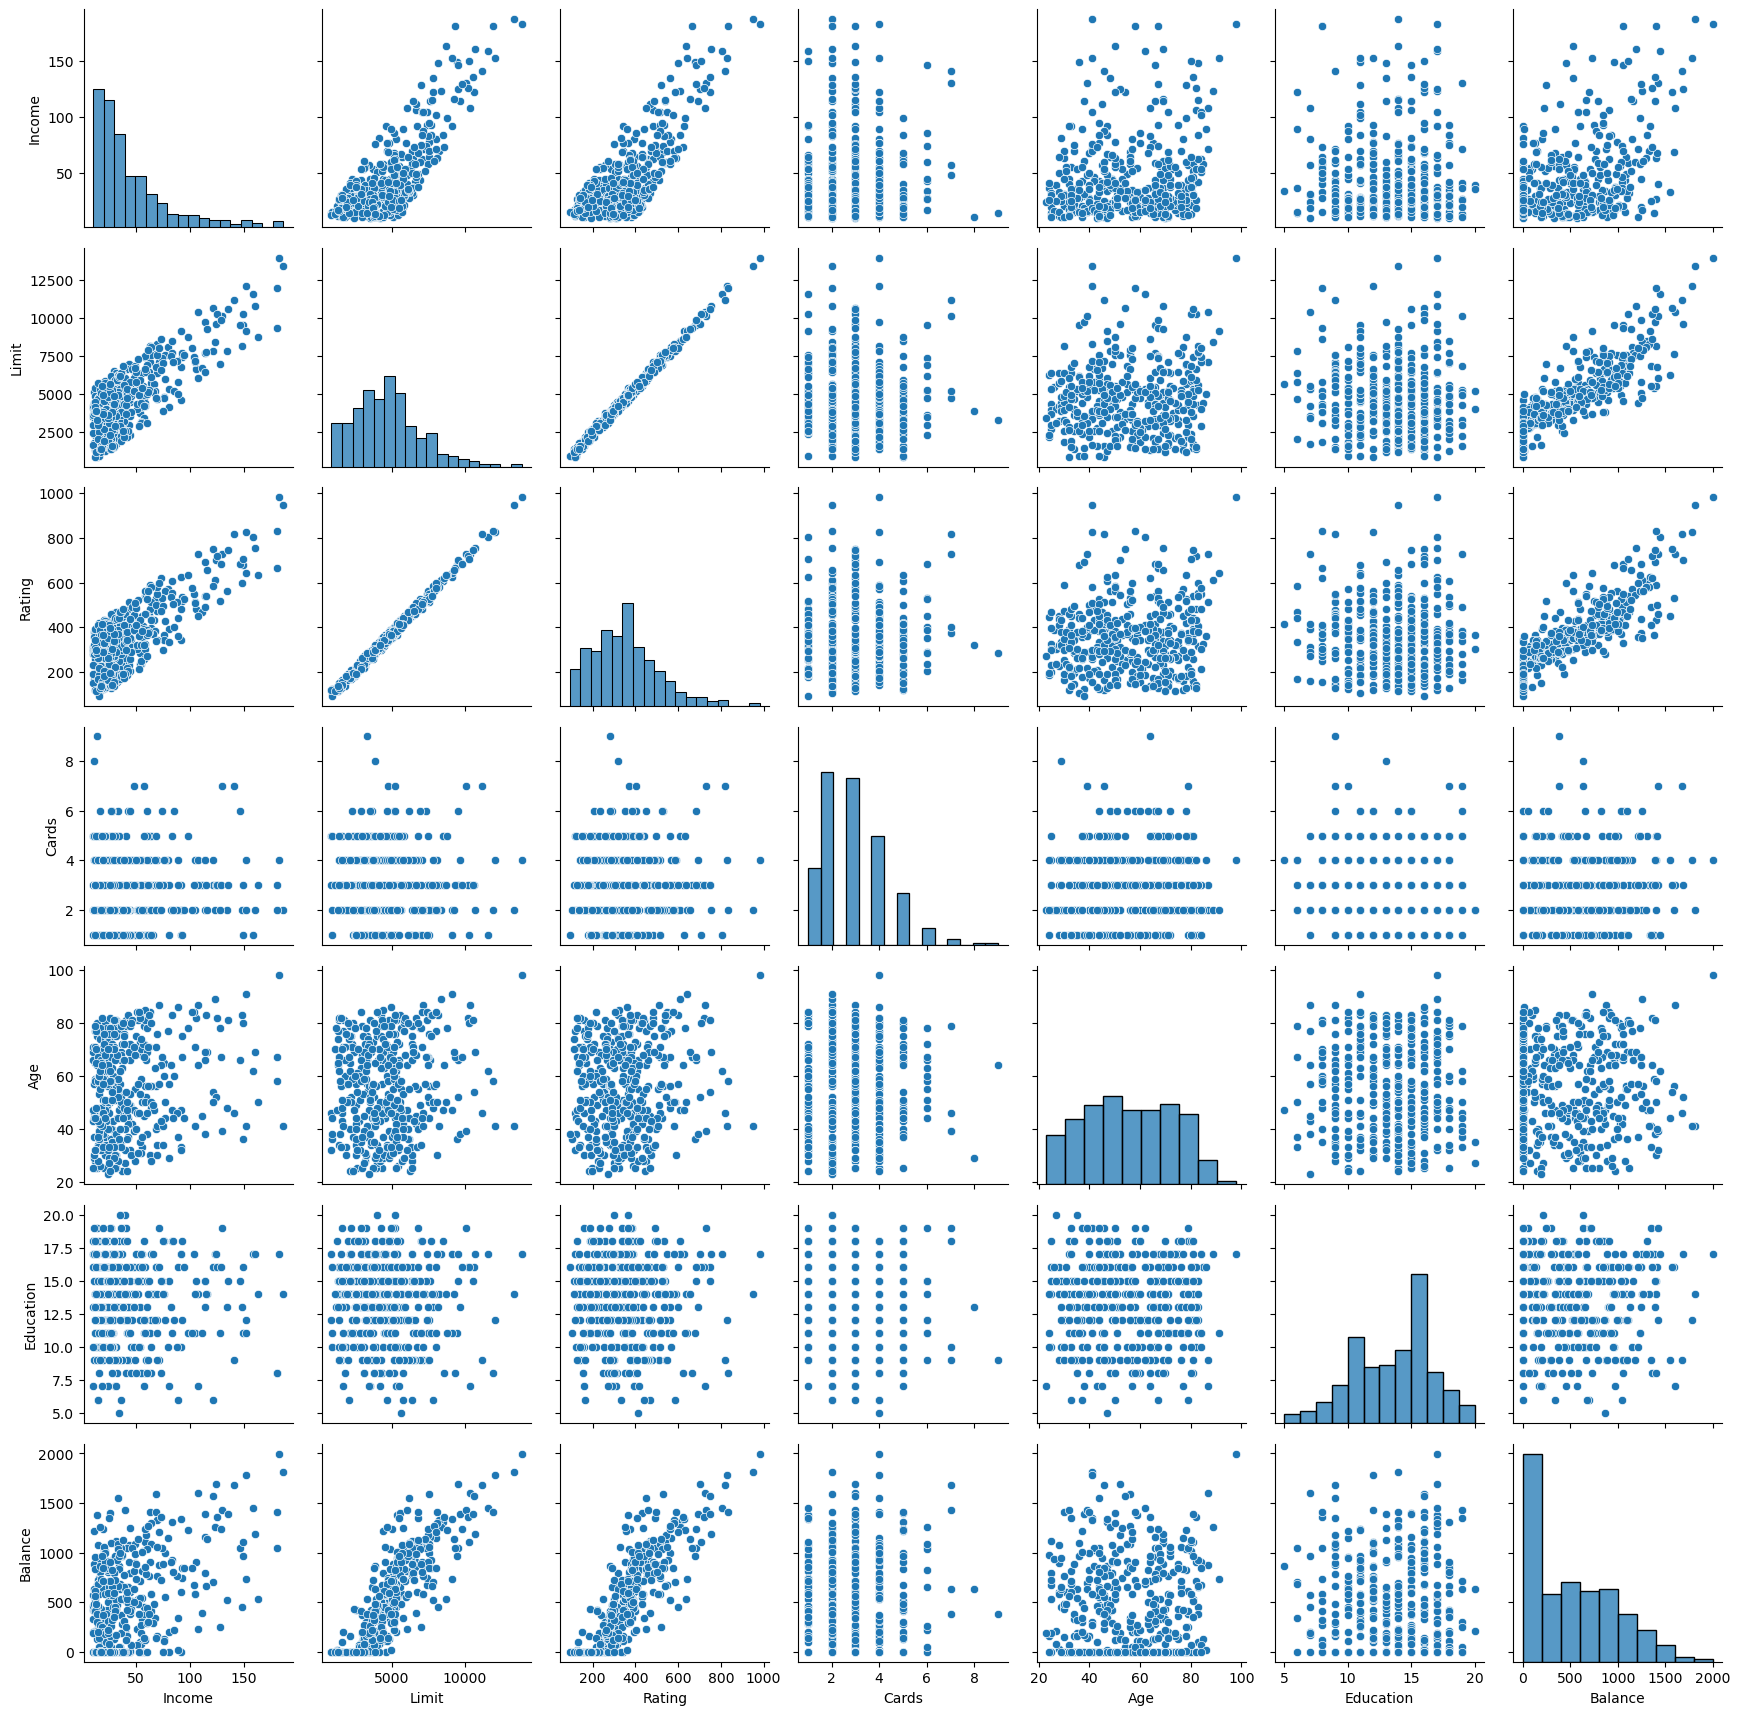

In [10]:
# scatter plot, histogram 확인

g = sns.PairGrid(credit)
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)

In [11]:
# 더미변수

# Student >> 문자 (YES, NO) > 숫자(0, 1) 로 변경 student_dummy

credit['Student_dummy'] = credit['Student'].replace(to_replace=['Yes','No'], value = [0,1])

In [12]:
credit

,Income,Limit,Rating,Cards,Age,Education,Own,Student,Married,Region,Balance,Student_dummy
0,14.891,3606,283,2,34,11,No,No,Yes,South,333,1
1,106.025,6645,483,3,82,15,Yes,Yes,Yes,West,903,0
2,104.593,7075,514,4,71,11,No,No,No,West,580,1
3,148.924,9504,681,3,36,11,Yes,No,No,West,964,1
4,55.882,4897,357,2,68,16,No,No,Yes,South,331,1
...,...,...,...,...,...,...,...,...,...,...,...,...
395,12.096,4100,307,3,32,13,No,No,Yes,South,560,1
396,13.364,3838,296,5,65,17,No,No,No,East,480,1
397,57.872,4171,321,5,67,12,Yes,No,Yes,South,138,1
398,37.728,2525,192,1,44,13,No,No,Yes,South,0,1


In [13]:
credit.describe(include = 'all')

,Income,Limit,Rating,Cards,Age,Education,Own,Student,Married,Region,Balance,Student_dummy
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400,400,400,400,400.000000,400.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,2,2,2,3,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,Yes,No,Yes,South,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,207,360,245,199,NaN,NaN
mean,45.218885,4735.600000,354.940000,2.957500,55.667500,13.450000,NaN,NaN,NaN,NaN,520.015000,0.900000
std,35.244273,2308.198848,154.724143,1.371275,17.249807,3.125207,NaN,NaN,NaN,NaN,459.758877,0.300376
min,10.354000,855.000000,93.000000,1.000000,23.000000,5.000000,NaN,NaN,NaN,NaN,0.000000,0.000000
25%,21.007250,3088.000000,247.250000,2.000000,41.750000,11.000000,NaN,NaN,NaN,NaN,68.750000,1.000000
50%,33.115500,4622.500000,344.000000,3.000000,56.000000,14.000000,NaN,NaN,NaN,NaN,459.500000,1.000000
75%,57.470750,5872.750000,437.250000,4.000000,70.000000,16.000000,NaN,NaN,NaN,NaN,863.000000,1.000000


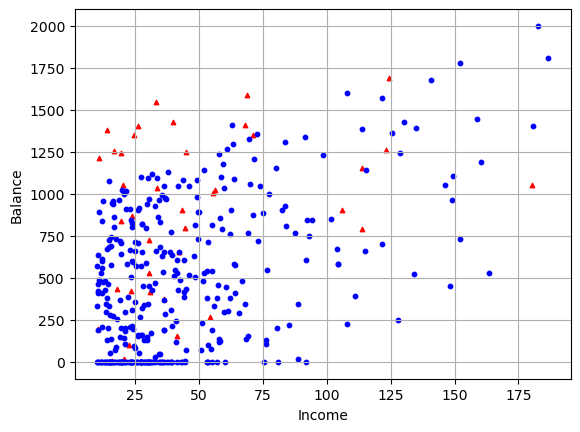

In [14]:
# 관계성 (상관관계 여부)

# balance (통장 잔고) / income(수입) / student(학생유무) 관계성 알아보기

# balance와 income 관계

fig, ax = plt.subplots()

# 조건 : 학생 여부
condition = credit['Student'] == 'Yes'
income_student = credit[condition]

condition = credit['Student'] == 'No'
income_non_student = credit[condition]

ax.scatter(income_student['Income'], income_student['Balance'], s = 10, marker = '^', c = 'red')
ax.scatter(income_non_student['Income'], income_non_student['Balance'], s = 10, marker = 'o', c='blue')

ax.set(xlabel = 'Income',
       ylabel = 'Balance')

plt.grid()
plt.show()

<AxesSubplot:xlabel='Student', ylabel='Balance'>

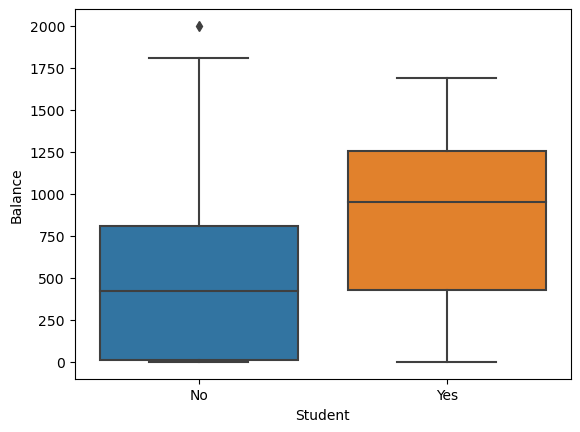

In [15]:
sns.boxplot(x = credit['Student'], y = credit['Balance'], data = credit)

## Auto 데이터

In [16]:
auto = pd.read_csv('./Auto.csv')
auto[:10]

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
5,15.0,8,429.0,198,4341,10.0,70,1,ford galaxie 500
6,14.0,8,454.0,220,4354,9.0,70,1,chevrolet impala
7,14.0,8,440.0,215,4312,8.5,70,1,plymouth fury iii
8,14.0,8,455.0,225,4425,10.0,70,1,pontiac catalina
9,15.0,8,390.0,190,3850,8.5,70,1,amc ambassador dpl


In [17]:
auto.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
year              int64
origin            int64
name             object
dtype: object

In [18]:
# 데이터 통계 확인

auto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           397 non-null    float64
 1   cylinders     397 non-null    int64  
 2   displacement  397 non-null    float64
 3   horsepower    397 non-null    object 
 4   weight        397 non-null    int64  
 5   acceleration  397 non-null    float64
 6   year          397 non-null    int64  
 7   origin        397 non-null    int64  
 8   name          397 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.0+ KB


In [19]:
auto.describe()

,mpg,cylinders,displacement,weight,acceleration,year,origin
count,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000
mean,23.515869,5.458438,193.532746,2970.261965,15.555668,75.994962,1.574307
std,7.825804,1.701577,104.379583,847.904119,2.749995,3.690005,0.802549
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.000000,2223.000000,13.800000,73.000000,1.000000
50%,23.000000,4.000000,146.000000,2800.000000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3609.000000,17.100000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


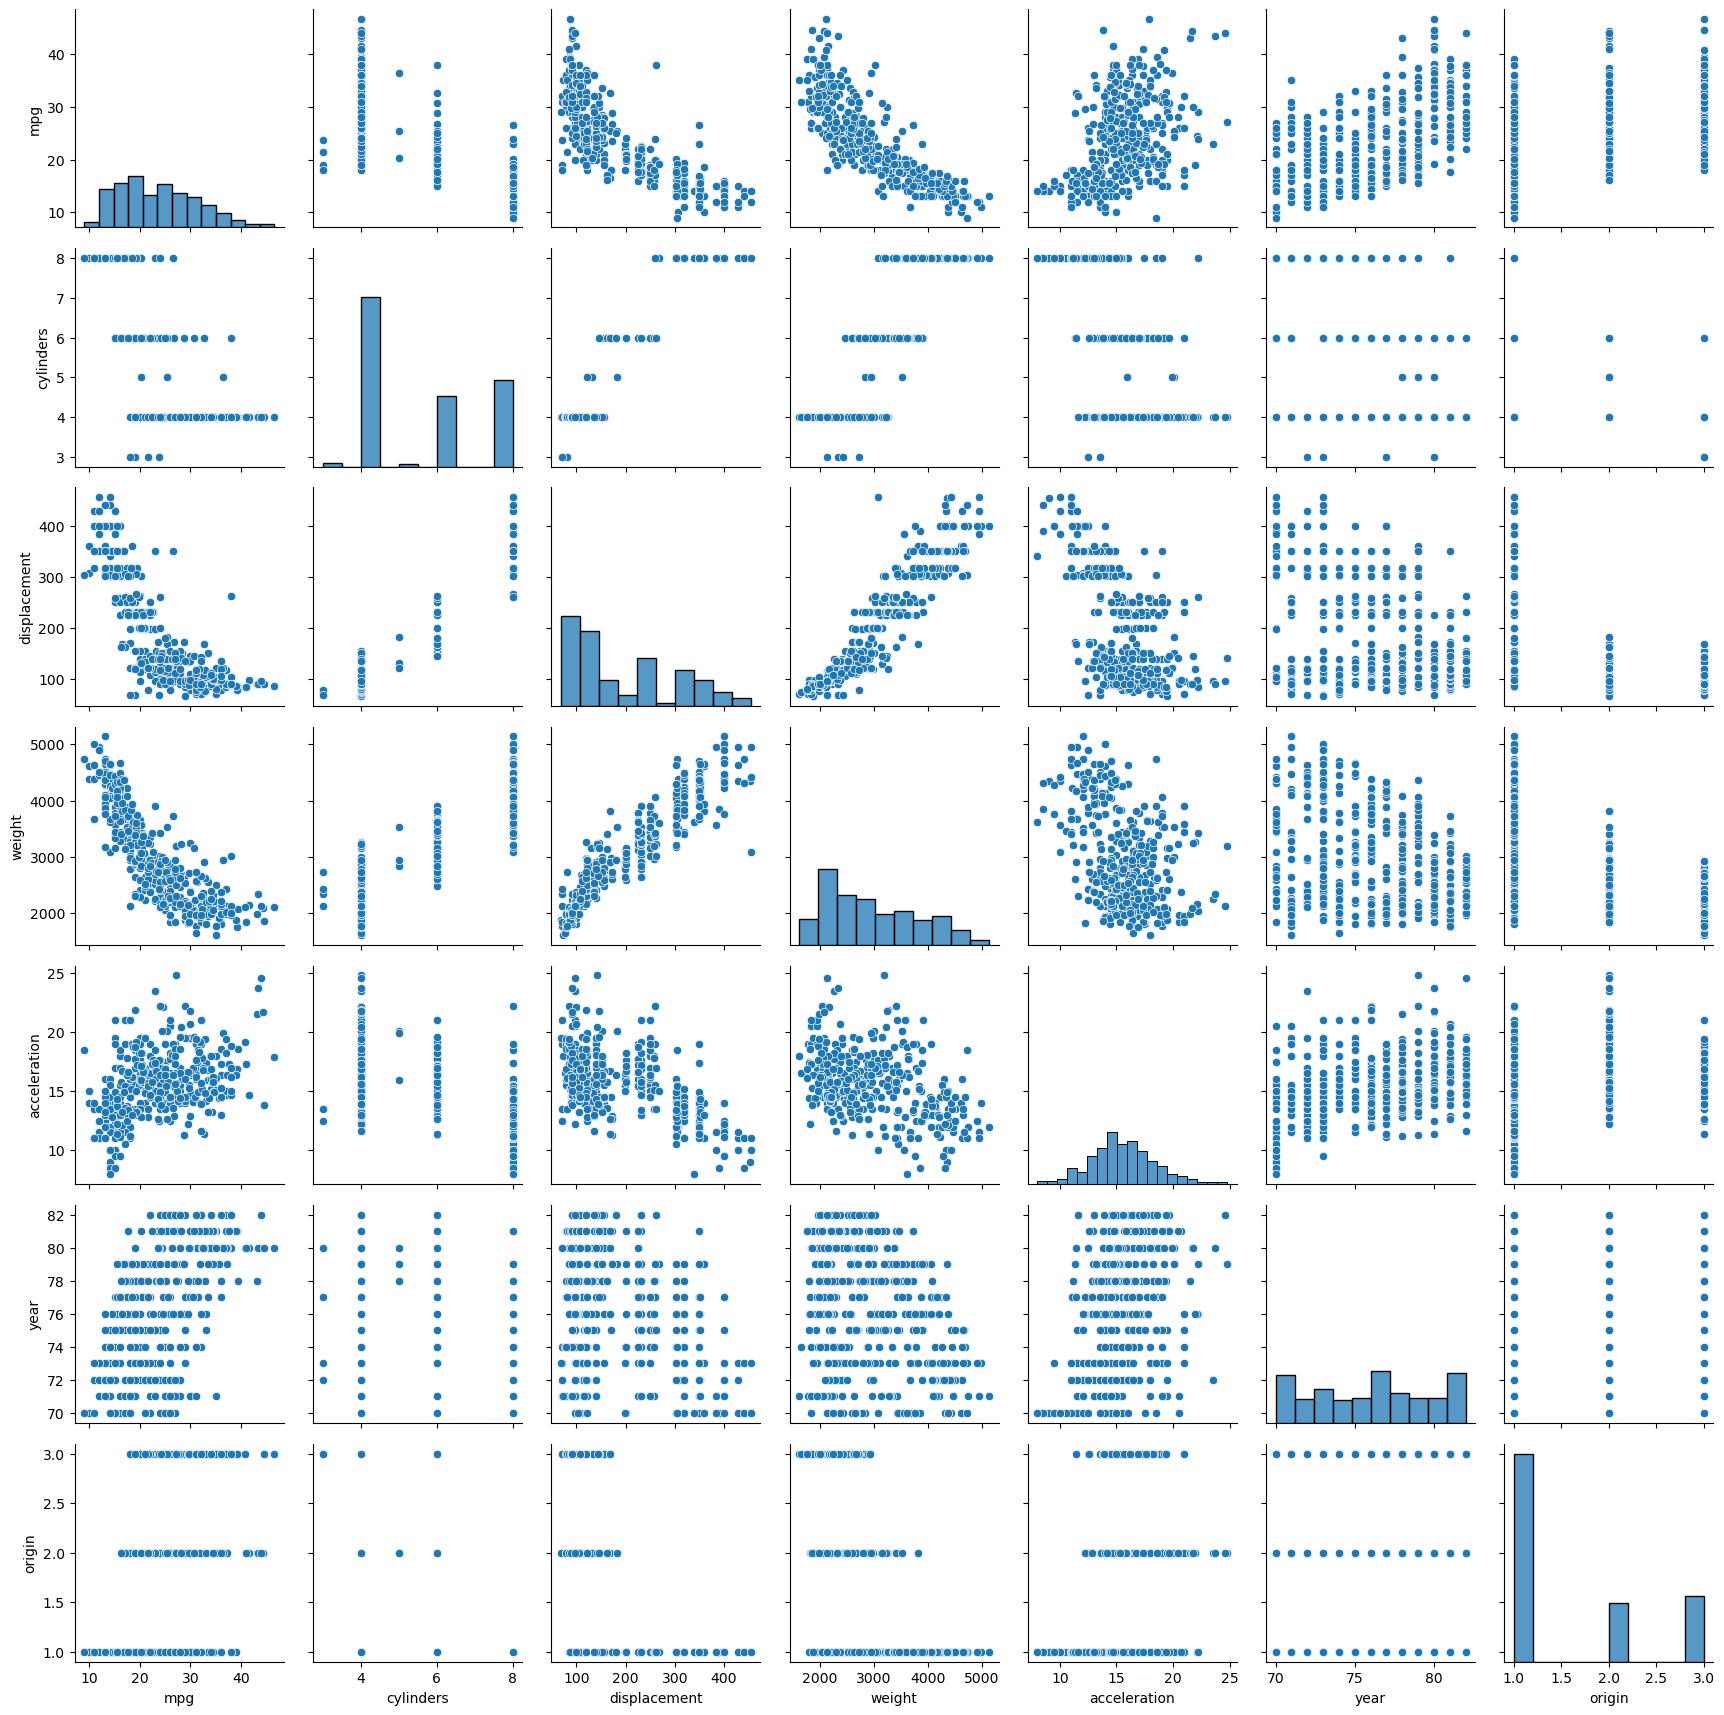

In [20]:
# scatter plot, histogram 확인

g = sns.PairGrid(auto)
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)

In [21]:
# 데이터 타입 변경
# horsepower 의 데이터 타입(object) >> numeric 변경

# pd.to_numeric(auto['horsepower'])
# ValueError: Unable to parse string "?" at position 32

In [22]:
auto['horsepower'][:35]

0     130
1     165
2     150
3     150
4     140
5     198
6     220
7     215
8     225
9     190
10    170
11    160
12    150
13    225
14     95
15     95
16     97
17     85
18     88
19     46
20     87
21     90
22     95
23    113
24     90
25    215
26    200
27    210
28    193
29     88
30     90
31     95
32      ?
33    100
34    105
Name: horsepower, dtype: object

In [23]:
auto['horsepower'] = auto['horsepower'].replace(to_replace='?', value = 0)

In [24]:
auto['horsepower'] = pd.to_numeric(auto['horsepower'])
auto.dtypes
# horsepower object > int64로 바뀜

mpg             float64
cylinders         int64
displacement    float64
horsepower        int64
weight            int64
acceleration    float64
year              int64
origin            int64
name             object
dtype: object

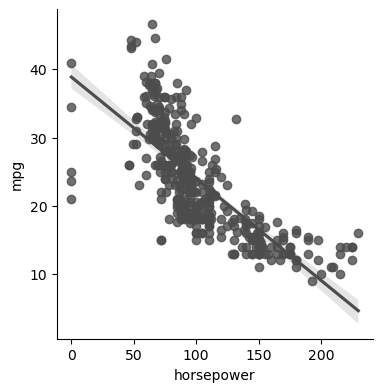

In [25]:
# mpg와 horsepower 관계성 알아보기

g = sns.PairGrid(auto, y_vars = ['mpg'], x_vars=['horsepower'], height = 4)
g.map(sns.regplot, color = '.3')

## income 데이터

In [26]:
income = pd.read_csv('./Income.csv', index_col = 0)
income.head()

,Education,Seniority,Income
1,21.586207,113.103448,99.917173
2,18.275862,119.310345,92.579135
3,12.068966,100.689655,34.678727
4,17.034483,187.586207,78.702806
5,19.931034,20.000000,68.009922


In [27]:
income.dtypes

Education    float64
Seniority    float64
Income       float64
dtype: object

In [28]:
income.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30 entries, 1 to 30
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Education  30 non-null     float64
 1   Seniority  30 non-null     float64
 2   Income     30 non-null     float64
dtypes: float64(3)
memory usage: 960.0 bytes


In [29]:
income.describe()

,Education,Seniority,Income
count,30.000000,30.000000,30.000000
mean,19.386207,93.862069,62.744733
std,15.648716,55.715623,27.013285
min,10.000000,20.000000,17.613593
25%,13.827586,44.827586,36.392043
50%,17.241379,94.482759,70.804791
75%,19.931034,133.275862,85.930608
max,100.000000,187.586207,99.917173


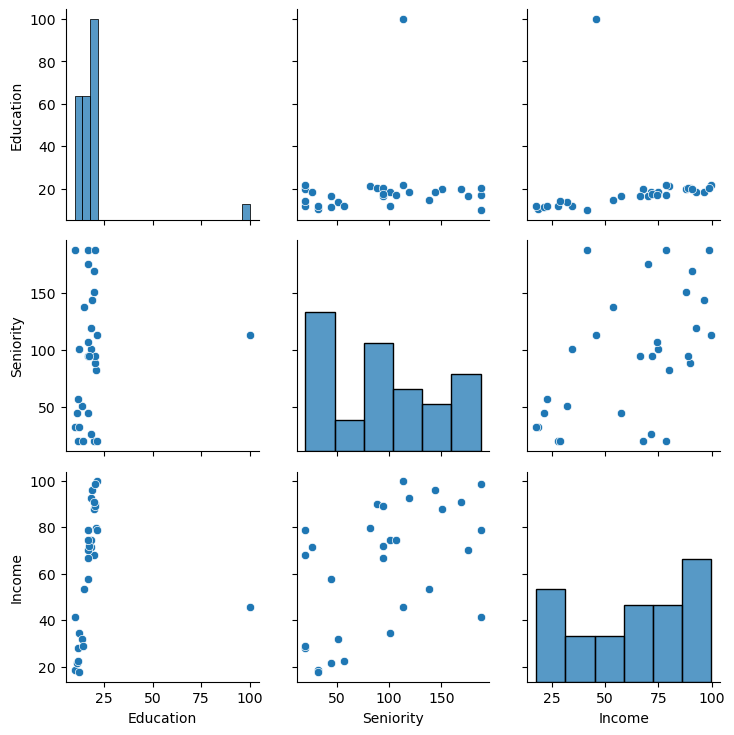

In [30]:
# scatter plot, histogram 확인하기

g = sns.PairGrid(income)
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)

In [31]:
income[:20]

,Education,Seniority,Income
1,21.586207,113.103448,99.917173
2,18.275862,119.310345,92.579135
3,12.068966,100.689655,34.678727
4,17.034483,187.586207,78.702806
5,19.931034,20.000000,68.009922
6,18.275862,26.206897,71.504485
7,19.931034,150.344828,87.970467
8,21.172414,82.068966,79.811030
9,20.344828,88.275862,90.006327
10,100.000000,113.103448,45.655530


In [32]:
income.loc[10]

Education    100.000000
Seniority    113.103448
Income        45.655530
Name: 10, dtype: float64

In [33]:
income.loc[10, 'Education'] = 10

income.loc[:20] # 10번 값 변경됨

,Education,Seniority,Income
1,21.586207,113.103448,99.917173
2,18.275862,119.310345,92.579135
3,12.068966,100.689655,34.678727
4,17.034483,187.586207,78.702806
5,19.931034,20.000000,68.009922
6,18.275862,26.206897,71.504485
7,19.931034,150.344828,87.970467
8,21.172414,82.068966,79.811030
9,20.344828,88.275862,90.006327
10,10.000000,113.103448,45.655530


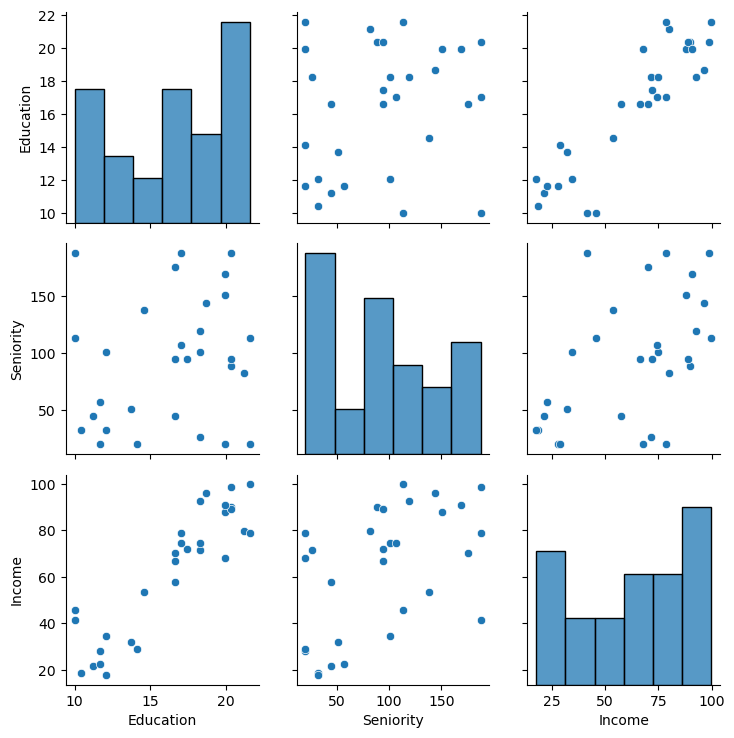

In [34]:
# scatter plot, histogram 확인하기

g = sns.PairGrid(income)
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)

In [35]:
# 삭제 한다면 ?

income = income.drop([10])
income

,Education,Seniority,Income
1,21.586207,113.103448,99.917173
2,18.275862,119.310345,92.579135
3,12.068966,100.689655,34.678727
4,17.034483,187.586207,78.702806
5,19.931034,20.000000,68.009922
6,18.275862,26.206897,71.504485
7,19.931034,150.344828,87.970467
8,21.172414,82.068966,79.811030
9,20.344828,88.275862,90.006327
11,13.724138,51.034483,31.913808


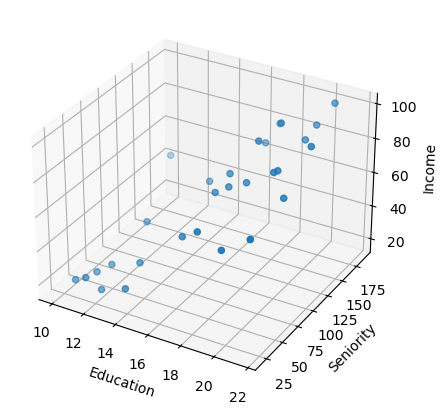

In [36]:
# income, education, seniority 관계성 알아보기

# 3차원 맛보기

plt.figure(figsize=(6,5))

axes = plt.axes(projection = '3d')
axes.scatter3D(income['Education'], income['Seniority'], income['Income'])

axes.set_xlabel('Education')
axes.set_ylabel('Seniority')
axes.set_zlabel('Income')

plt.show()